In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [40]:
# Load the CSV file into a DataFrame
data_types = {
    'sex': 'category',
    'diet_group': 'category',
    'age_group': 'category'
}
df = pd.read_csv('Results_21Mar2022.csv', dtype=data_types)

In [41]:
# Rename the values in the 'diet_group' column
diet_group_mapping = {
    'meat100': 'High Meat Consumption (100+ g/day)',
    'meat': 'Moderate Meat Consumption (50-99 g/day)',
    'meat50': 'Low Meat Consumption (<50 g/day)',
    'fish': 'Pescatarian Diet',
    'veggie': 'Vegetarian Diet',
    'vegan': 'Vegan Diet'
}
df['diet_group'] = df['diet_group'].map(diet_group_mapping)

# Verify the changes (optional)
print(df['diet_group'].unique())

# 'High Meat Consumption (100+ g/day)', 'Moderate Meat Consumption (50-99 g/day)','Low Meat Consumption (<50 g/day)', 'Fish-Based Diet', 'Vegetarian Diet', 'Vegan Diet'


['Pescatarian Diet', 'Low Meat Consumption (<50 g/day)', 'High Meat Consumption (100+ g/day)', 'Moderate Meat Consumption (50-99 g/day)', 'Vegan Diet', 'Vegetarian Diet']
Categories (6, object): ['Pescatarian Diet', 'Moderate Meat Consumption (50-99 g/day)', 'High Meat Consumption (100+ g/day)', 'Low Meat Consumption (<50 g/day)', 'Vegan Diet', 'Vegetarian Diet']


In [42]:
# Display column names and data types
for column in df.columns:
    print(f"Column Name: {column}")
    print(f"Data Type: {df[column].dtype}")

Column Name: mc_run_id
Data Type: int64
Column Name: grouping
Data Type: object
Column Name: mean_ghgs
Data Type: float64
Column Name: mean_land
Data Type: float64
Column Name: mean_watscar
Data Type: float64
Column Name: mean_eut
Data Type: float64
Column Name: mean_ghgs_ch4
Data Type: float64
Column Name: mean_ghgs_n2o
Data Type: float64
Column Name: mean_bio
Data Type: float64
Column Name: mean_watuse
Data Type: float64
Column Name: mean_acid
Data Type: float64
Column Name: sd_ghgs
Data Type: float64
Column Name: sd_land
Data Type: float64
Column Name: sd_watscar
Data Type: float64
Column Name: sd_eut
Data Type: float64
Column Name: sd_ghgs_ch4
Data Type: float64
Column Name: sd_ghgs_n2o
Data Type: float64
Column Name: sd_bio
Data Type: float64
Column Name: sd_watuse
Data Type: float64
Column Name: sd_acid
Data Type: float64
Column Name: n_participants
Data Type: int64
Column Name: sex
Data Type: category
Column Name: diet_group
Data Type: category
Column Name: age_group
Data Type: 

## Which diet is most beneficial for the environment?

In [43]:
# !pip install squarify

In [44]:
# x = df['diet_group']

# fig, ax = plt.subplots(figsize=(10, 6))

# # Creating the stacked bar chart
# bottoms = df['mean_ghgs']
# ax.bar(x, df['mean_ghgs'], label='GHG Emissions')
# ax.bar(x, df['mean_land'], bottom=bottoms, label='Land Use')
# bottoms += df['mean_land']
# ax.bar(x, df['mean_watscar'], bottom=bottoms, label='Water Scarcity Footprint')
# bottoms += df['mean_watscar']
# ax.bar(x, df['mean_eut'], bottom=bottoms, label='Eutrophication Potential')

# # Customization
# ax.set_ylabel('Mean Environmental Impact Scores')
# ax.set_title('Comparative Environmental Impact of Different Diets')
# ax.legend()
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

In [45]:
numeric_cols = ['mean_ghgs', 'mean_land', 'mean_watscar', 'mean_eut','mean_ghgs_n2o','mean_ghgs_ch4','mean_bio','mean_acid', 'mean_watuse']
df['total_impact'] = df[['mean_ghgs', 'mean_land', 'mean_watscar', 'mean_eut','mean_ghgs_n2o','mean_ghgs_ch4','mean_bio','mean_acid', 'mean_watuse']].sum(axis=1)

In [46]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# # Recalculate total impact after scaling
# df['total_impact'] = df[numeric_cols].sum(axis=1)


In [47]:
# # Function to balance the DataFrame
# def balance_dataframe_by_categories(df, categories):
#     # Calculate the smallest group size for feasible sampling
#     feasible_min_size = min(df.groupby(categories).size().min(), min(df[cat].value_counts().min() for cat in categories))

#     # Sample each category value group to feasible_min_size, handling small groups
#     balanced_df = pd.DataFrame()
#     for _, group in df.groupby(categories):
#         if len(group) < feasible_min_size:
#             sampled_group = group.sample(n=len(group), replace=True, random_state=1)  # Use replace=True for small groups
#         else:
#             sampled_group = group.sample(n=feasible_min_size, replace=False, random_state=1)
#         balanced_df = pd.concat([balanced_df, sampled_group])

#     return balanced_df

# # List of categories to balance by
# categories = ['sex', 'diet_group', 'age_group']

# # Balance the DataFrame
# balanced_df = balance_dataframe_by_categories(df, categories)
# # Display the balanced DataFrame
# print(balanced_df)

In [48]:
# df['total_impact'] = df[['mean_ghgs', 'mean_land', 'mean_watscar', 'mean_eut','mean_ghgs_n2o','mean_ghgs_ch4','mean_bio','mean_acid', 'mean_watuse']].sum(axis=1)

# # Step 2: Identify the best and worst diets based on total environmental impact
# best_diet = df.loc[df['total_impact'].idxmin()]['diet_group']
# worst_diet = df.loc[df['total_impact'].idxmax()]['diet_group']

# # Filter data for best and worst diets using correct indexing with .loc
# best_diet_data = df.loc[df['diet_group'] == best_diet, numeric_cols].mean()
# worst_diet_data = df.loc[df['diet_group'] == worst_diet, numeric_cols].mean()

# # Step 3: Calculate differences for each environmental metric
# categories = ['mean_ghgs', 'mean_land', 'mean_watscar', 'mean_eut']
# differences = worst_diet_data[categories] - best_diet_data[categories]
# differences['total'] = differences.sum()


# # Step 4: Plot Waterfall Chart
# fig, ax = plt.subplots(figsize=(10, 6))
# waterfall_values = [0] + differences.tolist()
# waterfall_increments = np.cumsum(waterfall_values)

# # Base bar for the best diet's impact
# ax.bar(categories + ['Total'], waterfall_values, bottom=waterfall_increments[:-1], color='skyblue')

# # Custom formatting for the plot
# ax.axhline(0, color='k', linewidth=0.8)
# ax.set_title(f'Disparity Between the Best ({best_diet}) and Worst ({worst_diet}) Diets')
# ax.set_ylabel('Environmental Impact Score Difference')

# # Formatting y-axis to show values clearly
# ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))

# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


In [49]:
# fig = px.bar(
#     df,
#     x='diet_group',
#     y='total_impact',
#     color='sex',
#     facet_col='age_group',  # Creates a subplot for each age group
#     facet_col_wrap=4,       # Adjust based on how many age groups you have
#     title='Environmental Impact by Diet Group, Gender, and Age Group',
#     labels={'total_impact': 'Total Environmental Impact'},  # Custom labels for axes
#     height=800,  # Adjust height to accommodate all subplots
#     width=1200   # Adjust width based on preference
# )

# # Update the layout to make it more readable
# fig.update_layout(
#     legend_title_text='Gender',
#     barmode='group',  # Use 'stack' for stacked bar chart
#     legend=dict(
#         orientation="h",
#         yanchor="bottom",
#         y=1.02,
#         xanchor="right",
#         x=1
#     )
# )

# # Show interactive figure
# fig.show()

c:\users\neeraj\appdata\local\programs\python\python312\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\users\neeraj\appdata\local\programs\python\python312\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\users\neeraj\appdata\local\programs\python\python312\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default a

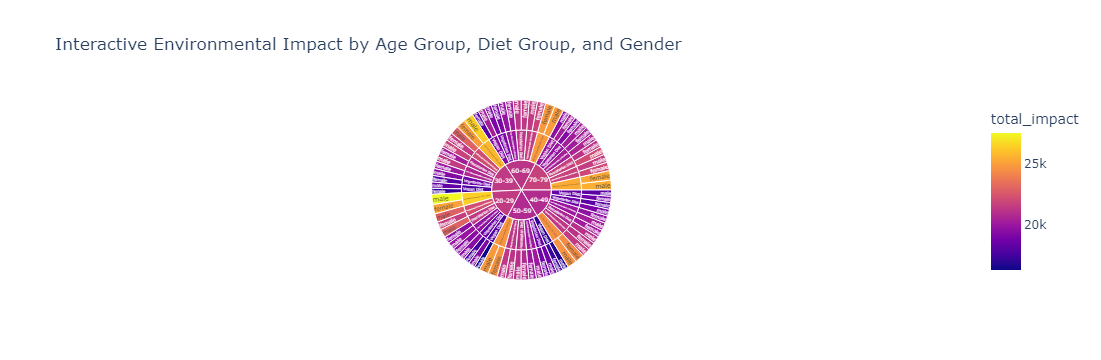

In [50]:
# Assuming 'df' is your DataFrame and you have hierarchical data such as age_group -> diet_group -> sex
# You also need a measure to sum up for the sizes of the Sunburst segments, such as 'total_impact'
fig = px.sunburst(
    df,
    path=['age_group', 'diet_group', 'sex'],  # Define hierarchy
    values='total_impact',  # Define the size of the segments
    color='total_impact',  # Color segments by their size/value
    title='Interactive Environmental Impact by Age Group, Diet Group, and Gender'
)

# Show the interactive figure
fig.show()


c:\users\neeraj\appdata\local\programs\python\python312\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\users\neeraj\appdata\local\programs\python\python312\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\users\neeraj\appdata\local\programs\python\python312\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default a

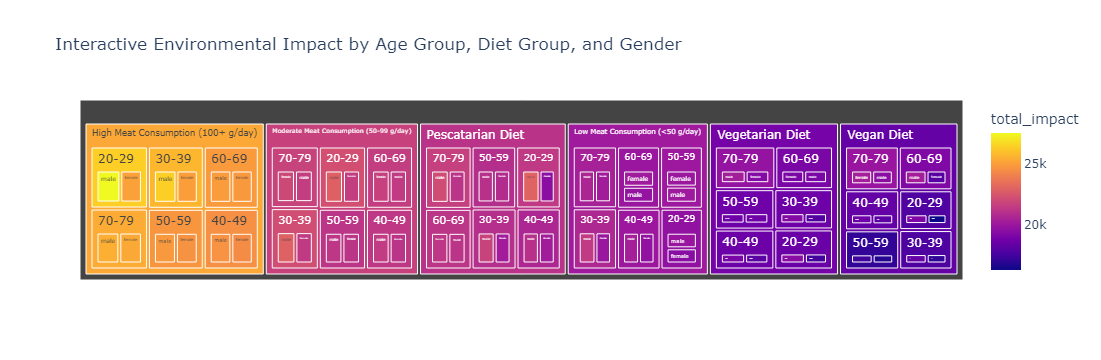

In [51]:
# Assuming 'df' is your DataFrame with a hierarchical structure and a measure for size
fig = px.treemap(
    df,
    path=['diet_group', 'age_group', 'sex'],  # Define hierarchy
    values='total_impact',  # Size of the rectangles
    color='total_impact',  # Color based on the size/value or another variable
    title='Interactive Environmental Impact by Age Group, Diet Group, and Gender'
)

fig.show()

# Convert the figure to an HTML div element
fig_html = pio.to_html(fig, full_html=False)

# Save the HTML to a file or print it
# print(fig_html)
# You can also write this string to an HTML file if needed
with open("plot_treemap.html", "w", encoding="utf-8") as file:
    file.write(fig_html)


In [52]:
# # Let's assume you want to show the cumulative impact starting from 'mean_ghgs'
# # and each step shows the added impact of the next variable.
# # The 'total_impact' column is used as the final value in the waterfall chart.

# # This list would be the ordered factors you want to show in the waterfall chart.
# # Replace these with your actual factors.

# factors = ['mean_ghgs', 'mean_ghgs_ch4', 'mean_ghgs_n2o', 'mean_bio', 'mean_acid', 'mean_watuse', 'total_impact']

# # Calculating the starting and ending values for each step
# starting_values = [0] + df[factors[:-1]].sum().cumsum().tolist()
# ending_values = df[factors].sum().cumsum().tolist()

# # We will need to calculate the incremental change for each step
# changes = [ending_values[0]] + [end - start for start, end in zip(starting_values[1:], ending_values)]

# # Create the waterfall chart
# fig = go.Figure(go.Waterfall(
#     name = "Waterfall",
#     orientation = "v",
#     measure = ["absolute"] + ["relative"] * (len(factors) - 2) + ["total"],
#     x = factors,
#     textposition = "outside",
#     text = [str(round(val, 2)) for val in changes],
#     y = changes,
#     connector = {"line":{"color":"rgb(63, 63, 63)"}},
# ))

# # Update layout
# fig.update_layout(
#     title = "Cumulative Environmental Impact by Factor",
#     showlegend = True
# )

# fig.show()


C:\Users\Neeraj\AppData\Local\Temp\ipykernel_14100\1969301480.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



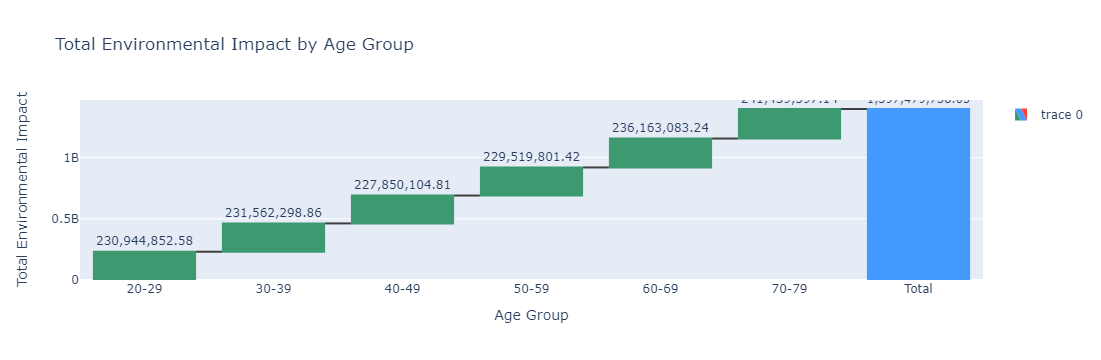

In [53]:
# Group by age group and sum the total impacts
age_group_totals = df.groupby('age_group')['total_impact'].sum().reindex(['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'])

# Calculate the grand total of all age groups
total_sum = age_group_totals.sum()

# Prepare data for the waterfall chart
x_values = list(age_group_totals.index) + ['Total']
y_values = list(age_group_totals) + [total_sum]
text_values = [f'{value:,.2f}' for value in y_values]

# Define how each bar should be treated ('relative' for changes, 'total' for final sums)
measure = ['relative' for _ in age_group_totals] + ['total']

# Create the waterfall chart
fig = go.Figure(go.Waterfall(
    x=x_values,
    textposition = "outside",
    text=text_values,
    y=y_values,
    measure=measure,
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

fig.update_layout(
    title='Total Environmental Impact by Age Group',
    xaxis_title='Age Group',
    yaxis_title='Total Environmental Impact',
    showlegend=True
)

fig.show()

# Convert the figure to an HTML div element
fig_html = pio.to_html(fig, full_html=False)

# Save the HTML to a file or print it
# print(fig_html)
# You can also write this string to an HTML file if needed
with open("plot_waterfall_age.html", "w", encoding="utf-8") as file:
    file.write(fig_html)

C:\Users\Neeraj\AppData\Local\Temp\ipykernel_14100\76160798.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



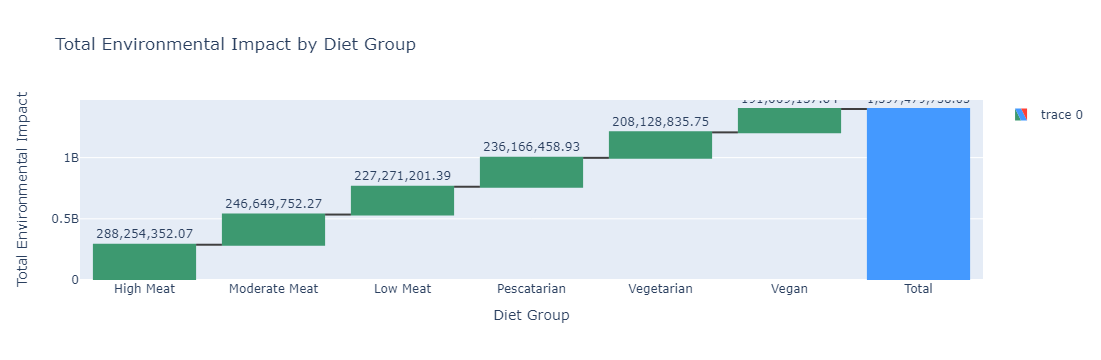

In [54]:
# Rename the values in the 'diet_group' column
diet_group_mapping = {
    'High Meat Consumption (100+ g/day)':'High Meat',
    'Moderate Meat Consumption (50-99 g/day)':'Moderate Meat',
    'Low Meat Consumption (<50 g/day)':'Low Meat',
    'Pescatarian Diet':'Pescatarian',
    'Vegetarian Diet':'Vegetarian',
    'Vegan Diet':'Vegan'
}


df['diet_group'] = df['diet_group'].map(diet_group_mapping)

# Group by diet group and sum the total impacts
diet_group_totals = df.groupby('diet_group')['total_impact'].sum().reindex(['High Meat', 'Moderate Meat','Low Meat','Pescatarian', 'Vegetarian', 'Vegan'])

# diet_group_totals = df.groupby('diet_group')['total_impact'].sum().reindex(['High Meat Consumption (100+ g/day)', 'Moderate Meat Consumption (50-99 g/day)','Low Meat Consumption (<50 g/day)', 'Fish-Based Diet', 'Vegetarian Diet', 'Vegan Diet'
# ])


# Calculate the grand total of all diet groups
total_sum = diet_group_totals.sum()

# Prepare data for the waterfall chart
x_values = list(diet_group_totals.index) + ['Total']
y_values = list(diet_group_totals) + [total_sum]
text_values = [f'{value:,.2f}' for value in y_values]

# Define how each bar should be treated ('relative' for changes, 'total' for final sums)
measure = ['relative' for _ in diet_group_totals] + ['total']

# Create the waterfall chart
fig = go.Figure(go.Waterfall(
    x=x_values,
    textposition = "outside",
    text=text_values,
    y=y_values,
    measure=measure,
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

fig.update_layout(
    title='Total Environmental Impact by Diet Group',
    xaxis_title='Diet Group',
    yaxis_title='Total Environmental Impact',
    showlegend=True
)

fig.show()

# Convert the figure to an HTML div element
fig_html = pio.to_html(fig, full_html=False)

# Save the HTML to a file or print it
# print(fig_html)
# You can also write this string to an HTML file if needed
with open("plot_waterfall_diet.html", "w", encoding="utf-8") as file:
    file.write(fig_html)